# Model comparisons - 02 Pertermann and Hirschmann (2003)
This notebook compares the calculation results from pyMelt to the figures published in the Pertermann and Hirschmann (2003) manuscript.

Import required packages:

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pyMelt as m

## Figure 4 - melt fraction vs temperature
Calculate melt fraction and temperature:

In [4]:
pertermann = m.lithologies.pertermann.g2()
T = np.linspace(1200, 1700, 501)
pertermann_F = [pertermann.F(3.0, i) for i in T]

Overlay the figure from Pertermann and Hirschmann:

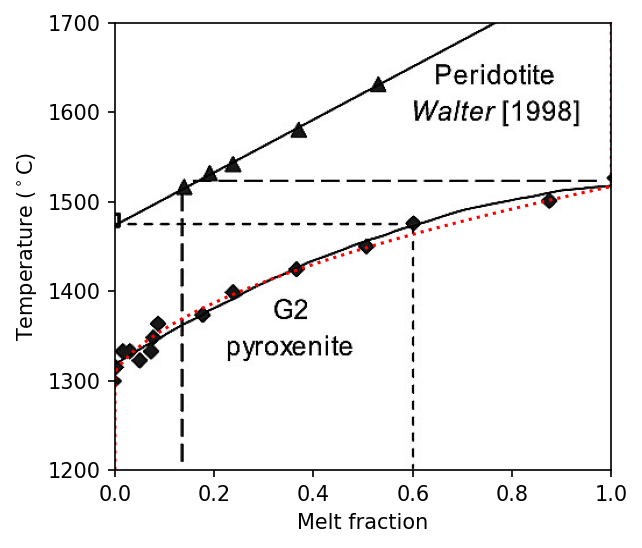

In [9]:
f, a = plt.subplots(figsize=(4.27, 3.95), dpi=150)

pub = plt.imread('figures/pertermann_fig4.jpg')

a.set_xlim(0.0, 1.0)
a.set_ylim(1200, 1700)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(pertermann_F, T, c='r', ls=':')

a.set_ylabel('Temperature ($^\circ$C)')
a.set_xlabel('Melt fraction')

plt.show()

## Figure 5a - melt fraction vs rescaled temperature
Calculate rescaled temperature:

In [28]:
F = np.linspace(0.0, 1.0, 21)
def TRescaled(T, P):
    pertermann_solidus = pertermann.TSolidus(P)
    pertermann_liquidus = pertermann.TLiquidus(P)
    TRescaled = (T-pertermann_solidus)/(pertermann_liquidus-pertermann_solidus)
    return TRescaled

TRescaled_pertermann = [TRescaled(i,3.0) for i in T]

Overlay figure from Pertermann and Hirschmann:

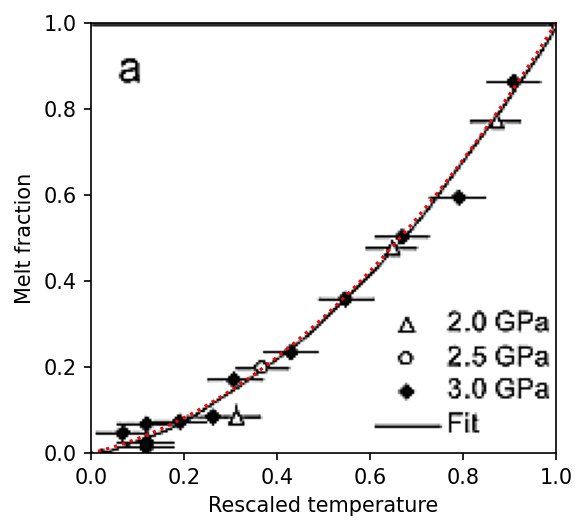

In [29]:
f, a = plt.subplots(figsize=(4.00, 3.80), dpi=150)

pub = plt.imread('figures/pertermann_fig5a.png')
a.set_xlim(0.0, 1.0)
a.set_ylim(0.0, 1.0)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(TRescaled_pertermann, pertermann_F, c='r', ls=':')

a.set_xlabel('Rescaled temperature')
a.set_ylabel('Melt fraction')


plt.show()